In [1]:
#Logistic Regression 

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import datetime
import numpy as np
from datetime import date
from matplotlib.pyplot import figure
sns.set()
from sklearn.metrics import confusion_matrix

df = pd.read_csv("EurUsd.csv", names=["time", "open", "high","low", "close", "volume"])
martingaleResultdf = pd.read_csv("val.csv", names=["volume", "profit/loss", "DateTime"])


In [2]:
#Results From Matingale Sysetm
martingaleResultdf

volume  profit/loss         DateTime
0    20,000        -1.38  8/24/2020 17:31
1    20,000        -8.11  8/24/2020 18:06
2    42,000        -0.96  8/24/2020 18:36
3    88,000       -10.78  8/24/2020 19:06
4   184,000        84.56  8/24/2020 19:36
5    20,000        -4.29  8/24/2020 20:07
6    20,000        -5.51  8/24/2020 21:07
7    20,000        -5.97  8/24/2020 22:07
8    42,000        -9.32  8/24/2020 22:37
9    20,000        -2.60  8/24/2020 23:37
10   20,000        -1.38   8/25/2020 0:37
11   20,000         2.75   8/25/2020 1:37
12   20,000         5.35   8/25/2020 2:08
13   20,000        -2.90   8/25/2020 2:38
14   42,000       -14.43   8/25/2020 3:08
15   20,000        -0.76   8/25/2020 4:08
16   20,000        -2.59   8/25/2020 5:08
17   20,000        -2.29   8/25/2020 6:08
18   20,000        -6.88   8/25/2020 7:08
19   42,000        -3.53   8/25/2020 7:38
20   88,000        79.30   8/25/2020 8:09
21   20,000       -21.25   8/25/2020 9:09
22   42,000       -40.70   8/25/2020 9:39
23   88,000        38.26  8/25/2020 10:09
24   20,000        -1.52  8/25/2020 11:09
25   42,000        25.58  8/25/2020 11:39
26   20,000       -11.72  8/25/2020 12:39
27   42,000        21.43  8/25/2020 13:10
28   20,000       -31.60  8/25/2020 13:40
29   42,000         1.92  8/25/2020 14:10
30   20,000        -4.72  8/25/2020 14:40
31   42,000         3.20  8/25/2020 15:10
32   20,000         5.49  8/25/2020 15:41

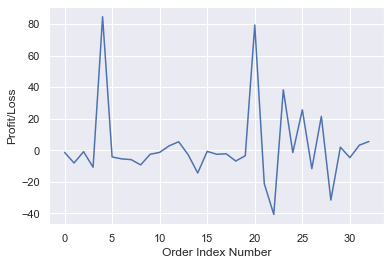

In [3]:
#Where the result plots for the maringale system were printed 
plt.xlabel("Order Index Number")
plt.ylabel("Profit/Loss")
plt.plot(martingaleResultdf['profit/loss'])


(array([ 2.,  1., 11., 14.,  1.,  1.,  1.,  0.,  0.,  2.]),
 array([-40.7  , -28.174, -15.648,  -3.122,   9.404,  21.93 ,  34.456,
         46.982,  59.508,  72.034,  84.56 ]),
 <a list of 10 Patch objects>)

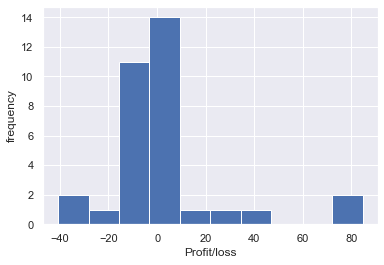

In [4]:
plt.ylabel("frequency")
plt.xlabel("Profit/loss")
plt.hist(martingaleResultdf['profit/loss'])

(array([20.,  0.,  0.,  9.,  0.,  0.,  3.,  0.,  0.,  1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

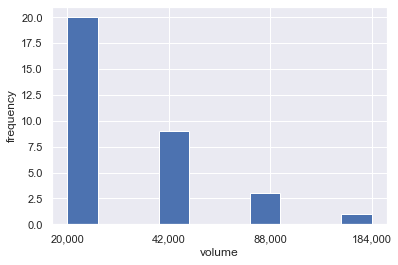

In [5]:
plt.ylabel("frequency")
plt.xlabel("volume")
plt.hist(martingaleResultdf['volume'])

In [6]:
df['low'] = df['low'].astype(float)
df['high'] = df['high'].astype(float)
df['open'] = df['open'].astype(float)
df['low'] = df['low'].astype(float)
df['close'] = df['close'].astype(float)
df['volume'] = df['volume'].astype(float)
df['time'] = df['time'].astype(str)

In [7]:
#Use future column to label the dataset 

def classify(current, future):
    if float(future) > float(current):
        return 1
    else:
        return 0 

In [8]:
#Removes the weekend entrys where the market is closed and line shows 0'
indexNames = df[ (df['volume'] < 999)].index
df.drop(indexNames , inplace=True)
df = df.reset_index(drop=True)
print(len(df))
print(df)

174733
                    time     open     high      low    close        volume
0          1/1/2010 0:00  1.43283  1.43293  1.43224  1.43293  6.086000e+08
1          1/1/2010 0:15  1.43285  1.43295  1.43229  1.43275  5.356000e+08
2          1/1/2010 0:30  1.43280  1.43303  1.43239  1.43281  4.363000e+08
3          1/1/2010 0:45  1.43285  1.43294  1.43229  1.43276  6.143000e+08
4          1/1/2010 1:00  1.43287  1.43292  1.43206  1.43282  7.053000e+08
...                  ...      ...      ...      ...      ...           ...
174728  12/30/2016 20:30  1.05299  1.05362  1.05268  1.05361  1.293230e+09
174729  12/30/2016 20:45  1.05358  1.05376  1.05238  1.05247  1.911700e+09
174730  12/30/2016 21:00  1.05244  1.05251  1.05179  1.05180  8.912800e+08
174731  12/30/2016 21:15  1.05179  1.05204  1.05141  1.05191  8.146200e+08
174732  12/30/2016 21:30  1.05191  1.05193  1.05140  1.05156  4.275700e+08

[174733 rows x 6 columns]


In [9]:
#To date time function so that we can convert Date to Unix timestamp, this is so that it can be processed in the logistic regression

def dateToTimestamp(neD):
    test = str(neD)
    f = "%m/%d/%Y %H:%M"
    date = datetime.datetime.strptime(test, f)
    timestamp = datetime.datetime.timestamp(date)
    return(timestamp)

In [10]:
#Calling the To dateTime function for each row in the dataset and printing i so we can keep track on the loops progress
for i in df.index:
        x = dateToTimestamp(df.iloc[i,0])
        df.at[i, 'time'] = int(x)
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [11]:
#Adding future column
df['future'] = df["close"].shift(-2)
#running classifiy function to create target column
df['target'] = list(map(classify, df["close"],df["future"] ))




In [12]:
#Check distribution of targets

newXDf = df.drop(columns=['future'])

newXDf['ewm'] = newXDf['close'].ewm(com=0.5).mean()
newXDf['SMA3'] = newXDf['close'].rolling(window=3).mean()
newXDf = newXDf.dropna()
newXDf
print(newXDf)
print('number of buy rows are '+ str(len(newXDf[newXDf['target'] == 0])))
print('number of sell rows are '+ str(len(newXDf[newXDf['target'] == 1])))
X_Train = newXDf

#Making Buy snd Sell the same length of 70,000 for buy and 70,000 for sell
sell = X_Train[X_Train['target'] == 1].iloc[0:80000]
buy = X_Train[X_Train['target'] == 0].iloc[0:80000]
categories = [buy,sell]
newYDf = pd.concat(categories)
tempSet = pd.concat(categories)
trainingSet = tempSet[['time', 'low', 'high','close','volume', 'SMA3', 'ewm','target']].copy()

#Shuffling the data below
trainingSet = trainingSet.sample(frac=1).reset_index(drop=True)
y = trainingSet['target']
X_Train = trainingSet
X_Train = X_Train.drop(columns=['target'])

newYDf = df['target']



              time     open     high      low    close        volume  target  \
2       1262305800  1.43280  1.43303  1.43239  1.43281  4.363000e+08       1   
3       1262306700  1.43285  1.43294  1.43229  1.43276  6.143000e+08       1   
4       1262307600  1.43287  1.43292  1.43206  1.43282  7.053000e+08       0   
5       1262308500  1.43290  1.43299  1.43212  1.43292  4.273000e+08       0   
6       1262309400  1.43267  1.43305  1.43209  1.43282  3.992000e+08       1   
...            ...      ...      ...      ...      ...           ...     ...   
174728  1483129800  1.05299  1.05362  1.05268  1.05361  1.293230e+09       0   
174729  1483130700  1.05358  1.05376  1.05238  1.05247  1.911700e+09       0   
174730  1483131600  1.05244  1.05251  1.05179  1.05180  8.912800e+08       0   
174731  1483132500  1.05179  1.05204  1.05141  1.05191  8.146200e+08       0   
174732  1483133400  1.05191  1.05193  1.05140  1.05156  4.275700e+08       0   

             ewm      SMA3  
2       1.

In [13]:

#Williams, M., 2020. Futuresharks/Ml-Finance. [online] GitHub. 
#Available at: <https://github.com/FutureSharks/ml-finance/blob/master/examples/8-deep-q-forex/rsi.py>
#[Accessed 03 August 2020].

# Code written by FutureSharks at the following git hub link above for the below function on creating RSI (Relative strength index)
def Rsi(price_series, period=14, method='ema'):
    '''
    Relative strength index
    '''

    delta = price_series.diff()
    up, down = delta.copy(), delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0

    if method == 'ema':
        # Calculate the EWMA RSI
        roll_up = up.ewm(com=period, min_periods=period, adjust=True, ignore_na=False).mean()
        roll_down = down.abs().ewm(com=period, min_periods=period, adjust=True, ignore_na=False).mean()
    elif method == 'sma':
        # Calculate the SMA RSI
        roll_up = up.rolling(window=period, min_periods=period, center=False).mean()
        roll_down = down.abs().rolling(window=period, min_periods=period, center=False).mean()

    RS = roll_up / roll_down
    RSI = 100.0 - (100.0 / (1.0 + RS))
    
    return RSI


In [14]:
#remove first 14 to get rid of nan values
trainingSet['rsi'] = Rsi(trainingSet['close'])
trainingSet = trainingSet.iloc[14:]
y = y.iloc[14:]
print(trainingSet)

              time      low     high    close        volume      SMA3  \
14      1365039900  1.28054  1.28079  1.28058  7.025600e+08  1.280583   
15      1416352500  1.25317  1.25350  1.25328  6.993700e+08  1.253253   
16      1457059500  1.09367  1.09410  1.09371  2.056130e+09  1.093903   
17      1443727800  1.11715  1.11750  1.11720  8.883900e+08  1.117343   
18      1391135400  1.35522  1.35541  1.35528  5.547700e+08  1.355243   
...            ...      ...      ...      ...           ...       ...   
159995  1360963800  1.33618  1.33647  1.33619  3.930500e+08  1.336347   
159996  1288583100  1.39752  1.39821  1.39794  6.390000e+08  1.398000   
159997  1270519200  1.35148  1.35238  1.35174  6.920000e+08  1.352003   
159998  1358531100  1.33108  1.33222  1.33207  1.404590e+09  1.331543   
159999  1285237800  1.33560  1.33782  1.33760  8.497000e+08  1.336733   

             ewm  target        rsi  
14      1.280591       0  46.016009  
15      1.253277       0  44.272250  
16      1

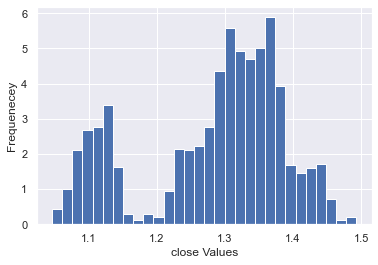

In [15]:
# The histogram shows that the closing prices are not normally distributed and that it seems almost multimodal 
plt.hist(trainingSet['close'], density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Frequenecey')
plt.xlabel('close Values');

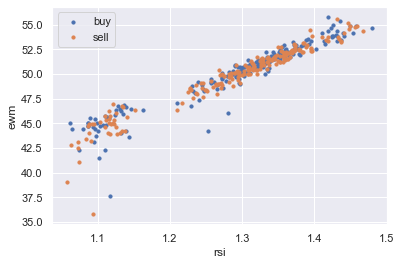

In [16]:
#Here I can change parametres to view the data in a scatter plot and alter the data size using .iloc on the dataset

trainingSet_sample_buy = trainingSet[trainingSet['target'] == 0]
trainingSet_sample_buy = trainingSet_sample_buy.iloc[0:200]
trainingSet_sample_sell = trainingSet[trainingSet['target'] == 1]
trainingSet_sample_sell = trainingSet_sample_sell.iloc[0:200]

plt.scatter(trainingSet_sample_buy['close'], trainingSet_sample_buy['rsi'], s=10, label='buy')
plt.scatter(trainingSet_sample_sell['close'], trainingSet_sample_sell['rsi'], s=10, label='sell')
plt.xlabel("rsi")
plt.ylabel("ewm")
plt.legend()
plt.show()

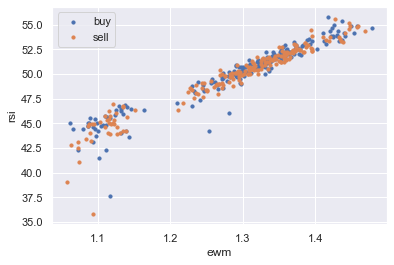

In [17]:
plt.scatter(trainingSet_sample_buy['SMA3'], trainingSet_sample_buy['rsi'], s=10, label='buy')
plt.scatter(trainingSet_sample_sell['SMA3'], trainingSet_sample_sell['rsi'], s=10, label='sell')
plt.xlabel("ewm")
plt.ylabel("rsi")
plt.legend()
plt.show()

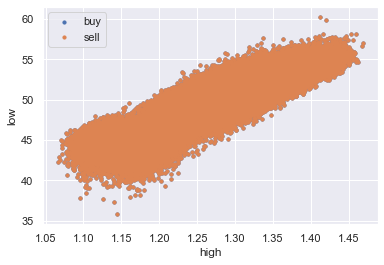

In [18]:
#Here I can change parametres to view the data in a scatter plot
trainingSet['ewm'] = trainingSet['close'].ewm(com=0.5).mean()
trainingSet

plt.scatter(trainingSet['ewm'], trainingSet['rsi'], s=10, label='buy')
plt.scatter(trainingSet['ewm'], trainingSet['rsi'], s=10, label='sell')
plt.xlabel("high")
plt.ylabel("low")
plt.legend()
plt.show()

In [19]:
#Set params for Logistic Regression
lr = LogisticRegression(penalty='l2',solver='newton-cg', max_iter=2000000)



def TrainMultiple (lr, x_values,y_values, x_testValues, y_test,penaltyType):
    results = []
    for x in range(len(lr)):
        print('on iteration '+ str(x))
        G = lr[x].fit(x_values, y_values)
        score = lr[x].score(x_testValues, y_test)
        results.append(score)
    if penaltyType == 0:    
        dataset = pd.DataFrame({'liblinearL2': [results[0]], 'newtonL2': [results[1]], 'sagL2':[results[2]], 'sagaL2': [results[3]],'lbfgsL2': [results[4]]})
    elif penaltyType == 1:
        dataset = pd.DataFrame({'lbfgs': [results[0]], 'newton': [results[1]], 'sag':[results[2]], 'saga': [results[3]]})
    else:
        dataset = pd.DataFrame({'sagaL1': [results[0]], 'sagaElasticNet': [results[1]]})
    print('Scores table created')    
    return(dataset)
    

#Split the training set and test set 


X_train, X_test, y_train, y_test = train_test_split(trainingSet, y, test_size=0.25)
X_test = X_test.drop(columns=['target'])
X_Train = X_train
X_train = X_train.drop(columns=['target'])
#Reset indexes to prevent errors later
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X = X_Train[['close', 'low']].copy()
x_test = X_test[['close', 'low']].copy()
X_rsi = X_Train[['ewm', 'rsi']].copy()
x_rsi = X_test[['ewm', 'rsi']].copy()
#Train the formatted dataset
x= lr.fit(X_rsi, y_train)
print('number of buy rows are '+ str(len(X_Train[X_Train['target'] == 0])))
print('number of sell rows are '+ str(len(X_Train[X_Train['target'] == 1])))

#Function to help identifiy false predictions
def misPatterns(predictions, labels):
    labels=pd.DataFrame(labels)
    predictions=pd.DataFrame(predictions)
    Data = labels
    Data['predictions']=predictions
    num1 = len(Data[(Data.iloc[:,0] == 0) & (Data['predictions'] == 1)])
    num2 = len(Data[(Data.iloc[:,0] == 1) & (Data['predictions'] == 0)])
    return(num1), (num2)
y_pred = lr.predict(x_rsi)
score = lr.score(x_rsi, y_test)
print("The accuracy rate of the trained data set on the test set is "+ str(score*100)+"%")

Miss_patterns = misPatterns(y_pred, y_test)
num1 = Miss_patterns[0]
num2 = Miss_patterns[1]
print("Number of times where target value equaled buy and predictions equaled sell is "+ str(num1)+ " times")
print("Number of times where target is equal to sell and the predictions are equal to buy is "+ str(num2)+ " times")


number of buy rows are 59875
number of sell rows are 60114
The accuracy rate of the trained data set on the test set is 50.49378703402755%
Number of times where target value equaled buy and predictions equaled sell is 8743 times
Number of times where target is equal to sell and the predictions are equal to buy is 11058 times


In [20]:
#Test all options of logistic regression with sklearn 
liblinearL2 = LogisticRegression(penalty='l2',solver='liblinear', max_iter=200000)
newtonL2 = LogisticRegression(penalty='l2',solver='newton-cg', max_iter=200000)
sagL2 = LogisticRegression(penalty='l2',solver='sag', max_iter=200000)
sagaElastic = LogisticRegression(penalty='elasticnet',solver='saga', max_iter=200000)
sagaL2 = LogisticRegression(penalty='l2',solver='saga', max_iter=200000)
sagaL1 = LogisticRegression(penalty='l1',solver='saga', max_iter=200000)
lbfgsL2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=200000)
newton = LogisticRegression(solver='newton-cg', max_iter=200000)
sag = LogisticRegression(solver='sag', max_iter=200000)
saga = LogisticRegression(solver='saga', max_iter=200000)
lbfgs = LogisticRegression(solver='lbfgs', max_iter=200000)
sagaElasticnet = LogisticRegression(penalty='elasticnet',  l1_ratio = 0 ,solver='saga', max_iter=200000)

nonPenaltys = [lbfgs, newton, sag, saga]
l2Penaltys = [liblinearL2, newtonL2, sagL2, sagaL2, lbfgsL2]
l1Penaltys = [sagaL1,sagaElasticnet]



In [ ]:
#Function that takes array of solvers and forms pandas datset of resuls
def TrainMultiple (lr, x_values,y_values, x_testValues, y_test,penaltyType):
    results = []
    for x in range(len(lr)):
        print('on iteration '+ str(x))
        G = lr[x].fit(x_values, y_values)
        score = lr[x].score(x_testValues, y_test)
        results.append(score)
    if penaltyType == 0:    
        dataset = pd.DataFrame({'liblinearL2': [results[0]], 'newtonL2': [results[1]], 'sagL2':[results[2]], 'sagaL2': [results[3]],'lbfgsL2': [results[4]]})
    elif penaltyType == 1:
        dataset = pd.DataFrame({'lbfgs': [results[0]], 'newton': [results[1]], 'sag':[results[2]], 'saga': [results[3]]})
    else:
        dataset = pd.DataFrame({'sagaL1': [results[0]], 'sagaElasticNet': [results[1]]})
    print('Scores table created')    
    return(dataset)

In [23]:
NonPenaltyResults = TrainMultiple(nonPenaltys,X_train,y_train,X_test,y_test,1)


on iteration 0
on iteration 1


C:\Users\Administrator\anaconda3\envs\New_tensorflow_gpu\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Administrator\anaconda3\envs\New_tensorflow_gpu\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Administrator\anaconda3\envs\New_tensorflow_gpu\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


on iteration 2
on iteration 3
Scores table created


In [24]:
#Results when using no regularization
NonPenaltyResults

lbfgs    newton       sag      saga
0  0.505388  0.505338  0.505363  0.505438

In [25]:

L1Results = TrainMultiple(l1Penaltys,X_train,y_train,X_test,y_test,2)


on iteration 0
on iteration 1
Scores table created


In [26]:
#Results of L1 Regularization
L1Results

sagaL1  sagaElasticNet
0  0.505263        0.505338

In [21]:
L2Results = TrainMultiple(l2Penaltys,X_train,y_train,X_test,y_test,0)


on iteration 0
on iteration 1


C:\Users\Administrator\anaconda3\envs\New_tensorflow_gpu\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Administrator\anaconda3\envs\New_tensorflow_gpu\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Administrator\anaconda3\envs\New_tensorflow_gpu\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


on iteration 2
on iteration 3
on iteration 4
Scores table created


In [27]:
#Results of L2 Regularization
L2Results

liblinearL2  newtonL2     sagL2    sagaL2   lbfgsL2
0     0.505338  0.505338  0.505363  0.505363  0.505388

In [117]:
#Function that produces a training curve with matplotlib
def myTrainCurve(trainSet,x_test, y_test, label):
    numbers = np.arange(0, 3000, 1).tolist()

    number = 0
    x_list = []
    y_list = [] 
    for  num in numbers:
        number = number + 0.0001
        someData = trainSet.copy().sample(frac= number)
        someData.reset_index(drop=True, inplace=True)
        target = pd.DataFrame(someData['target'])
        del someData['target']

        lr.fit(someData, target.values.ravel())
        #Each iteration in the forloop I update the latest results into 2 arrays
        y_list.append(lr.score(x_test, y_test))
        x_list.append(len(someData))
        
        
      #I then return the plot with the results of both arrays 
    return plt.plot(x_list, y_list, label=label)

In [118]:
#Creating the training curve
print(len(X_test))
print(len(y_test))
print(len(X_train))
print(len(y_train))
myTrainCurve(X_Train, X_train, y_train, "Training set accuracy")
plt.title("Learning Curve")
plt.xlabel("Training size")
plt.ylabel("Training Accuracy")
plt.legend()
plt.show()

39997
39997
119989
119989


C:\Users\Administrator\anaconda3\envs\New_tensorflow_gpu\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\Administrator\anaconda3\envs\New_tensorflow_gpu\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Administrator\anaconda3\envs\New_tensorflow_gpu\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\Administrator\anaconda3\envs\New_tensorflow_gpu\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Administrator\anaconda3\envs\New_tensorflow_gpu\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarn

KeyboardInterrupt: 

In [107]:
#Naive Bayes
from sklearn.naive_bayes import ComplementNB   
from sklearn.naive_bayes import MultinomialNB    
from sklearn.naive_bayes import GaussianNB    
from sklearn.naive_bayes import BernoulliNB    
from sklearn.naive_bayes import CategoricalNB    
nvbcom = ComplementNB()
nvbmul = MultinomialNB()
nvbgau = GaussianNB()
nvbber = BernoulliNB()
nvbcat = CategoricalNB()

naiveBayes = [nvbcom, nvbmul, nvbgau, nvbber, nvbcat]
results = []
for x in range(len(naiveBayes)):
    print(x)
    G = naiveBayes[x].fit(X_rsi, y_train)
    score = naiveBayes[x].score(x_rsi, y_test)
    results.append(score)

dataset = pd.DataFrame({'ComplementNB': [results[0]],'MultinomialNB': [results[1]],'GaussianNB': [results[2]],'BernoulliNB': [results[3]],'CategoricalNB': [results[4]]})   
nvbgau.fit(X, y_train)
newScore = nvbgau.score(x_test, y_test)
print(newScore)




0
1
2
3
4
0.5086881516113708


In [108]:
dataset

ComplementNB  MultinomialNB  GaussianNB  BernoulliNB  CategoricalNB
0      0.501863       0.497087    0.508088     0.497087       0.503163

In [109]:
#Testing Accuracy Rate, Batches of 10, 10/5'
lr = LogisticRegression(penalty='l2',solver='newton-cg', max_iter=2000000)
z = 15
results = []
for x in range(len(X)):
    
    if x > z:
        x_data = X_rsi.iloc[x-10:x]
        y_data = y_train.iloc[x-10:x]
        x_newtest = X_rsi.iloc[x-15:x-10]
        y_newtest = y_train.iloc[x-15:x-10]
        lr.fit(x_data, y_data)
        newScore = lr.score(x_newtest, y_newtest)
      
        results.append(newScore)
        z = z + 15
    if z > 300:
        break
resultDf = pd.DataFrame({'Accuracy Rate, Batches of 10, 10/5': results})

resultDf
                
                
        

Accuracy Rate, Batches of 10, 10/5
0                                  0.6
1                                  0.6
2                                  0.2
3                                  1.0
4                                  0.6
5                                  0.4
6                                  0.4
7                                  0.2
8                                  0.4
9                                  0.0
10                                 0.8
11                                 0.4
12                                 0.4
13                                 0.6
14                                 0.4
15                                 0.2
16                                 0.6
17                                 0.4
18                                 0.6
19                                 0.8

In [110]:
nvbgau = ComplementNB()   
for s in range(200):
    G = nvbgau.fit(X, y_train)
    newScore = nvbgau.score(x_test, y_test)
    print(newScore)
    

0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347576068
0.5124634347

In [111]:
#Testing Accuracy Rate, Batches of 10, 10/5'
nvbgau = ComplementNB()   
z = 1200
results = []
for x in range(len(X)):
    
    if x > z:
        x_data = X_rsi.iloc[x-1000:x]
        y_data = y_train.iloc[x-1000:x]
        x_newtest = X_rsi.iloc[x-1200:x-1000]
        y_newtest = y_train.iloc[x-1200:x-1000]
        nvbgau.fit(x_data, y_data)
        newScore = nvbgau.score(x_newtest, y_newtest)
      
        results.append(newScore)
        z = z + 1200
    if z > 60000:
        break
resultDf = pd.DataFrame({'Accuracy Rate, Batches of 1200, 1000/200': results})

resultDf
                
                
        

Accuracy Rate, Batches of 1200, 1000/200
0                                      0.545
1                                      0.480
2                                      0.500
3                                      0.530
4                                      0.535
5                                      0.515
6                                      0.460
7                                      0.565
8                                      0.465
9                                      0.515
10                                     0.565
11                                     0.495
12                                     0.475
13                                     0.585
14                                     0.500
15                                     0.575
16                                     0.505
17                                     0.505
18                                     0.445
19                                     0.515
20                                     0.470
21                                     0.470
22                                     0.420
23                                     0.500
24                                     0.465
25                                     0.555
26                                     0.480
27                                     0.460
28                                     0.450
29                                     0.480
30                                     0.515
31                                     0.500
32                                     0.505
33                                     0.470
34                                     0.510
35                                     0.425
36                                     0.500
37                                     0.465
38                                     0.505
39                                     0.520
40                                     0.485
41                                     0.515
42                                     0.525
43                                     0.495
44                                     0.485
45                                     0.395
46                                     0.545
47                                     0.510
48                                     0.460
49                                     0.545

In [126]:
#Compliment Naive Bayes Curve 
#Function that produces a training curve with matplotlib
def myTrainCurveNB(trainSet,x_test, y_test, label):
    numbers = np.arange(0, 3000, 1).tolist()

    number = 0
    x_list = []
    y_list = [] 
    for  num in numbers:
        number = number + 0.0001
        someData = trainSet.copy().sample(frac= number)
        someData.reset_index(drop=True, inplace=True)
        target = pd.DataFrame(someData['target'])
        del someData['target']

        nvbgau.fit(someData, target.values.ravel())
        #Each iteration in the forloop I update the latest results into 2 arrays
        y_list.append(lr.score(x_test, y_test))
        x_list.append(len(someData))
        
        
      #I then return the plot with the results of both arrays 
    return plt.plot(x_list, y_list, label=label)

C:\Users\Administrator\anaconda3\envs\New_tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


             ewm        rsi  target
70839   1.222276  46.836794     NaN
25813   1.141167  43.503634     NaN
87202   1.169316  42.378280     NaN
146661  1.300832  52.335593     NaN
65038   1.310041  50.453235     NaN
...          ...        ...     ...
6164    1.146568  46.879229     1.0
144624  1.299793  50.443421     NaN
12353   1.150836  44.160850     NaN
45290   1.260810  51.896157     NaN
108320  1.439061  54.569124     NaN

[9000 rows x 3 columns]
10000    0
10001    1
10002    0
10003    0
10004    0
        ..
11995    1
11996    1
11997    1
11998    0
11999    0
Name: target, Length: 2000, dtype: int64
             ewm        rsi
116464  1.344560  52.571002
47302   1.251300  49.401182
33490   1.165791  44.540598
147868  1.357559  52.579427
20904   1.337086  51.167369
...          ...        ...
145909  1.295103  52.182096
43659   1.269300  49.012090
1830    1.262426  50.376184
146681  1.197663  45.698572
120115  1.287047  49.024961

[2000 rows x 2 columns]


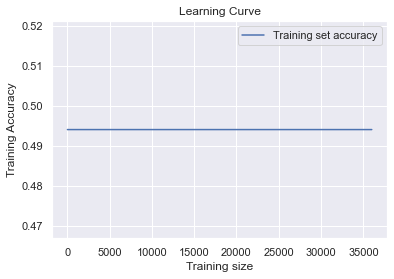

In [127]:
x_data = X_rsi.iloc[1000:10000]
y_data = y_train.iloc[1000:10000]
x_newtest = X_rsi.iloc[10000:12000]
y_newtest = y_train.iloc[10000:12000]
x_data['target'] = y_data.iloc[0:]
x_stuff =  X_Train[['ewm', 'rsi','target']].copy()

#Couldnt get working in time 
myTrainCurveNB(x_stuff, x_rsi, y_test, "Training set accuracy")
plt.title("Learning Curve")
plt.xlabel("Training size")
plt.ylabel("Training Accuracy")
plt.legend()
plt.show()

In [ ]:
y_pred = clf.predict(x_test)
score = clf.score(x_test, y_test)
print("The accuracy rate of the trained data set on the test set is "+ str(score*100)+"%")
clf_pf = ComplementNB()
clf_pf.partial_fit(X, y_train, np.unique(y_train))
score = clf_pf.score(x_test, y_test)
print("The accuracy rate of the trained data set on the test set is "+ str(score*100)+"%")
Miss_patterns = misPatterns(y_pred, y_test)

In [ ]:

clf = ComplementNB  ()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
print("The accuracy rate of the trained data set on the test set is "+ str(score*100)+"%")
Miss_patterns = misPatterns(y_pred, y_test)

In [ ]:
Miss_patterns = misPatterns(y_pred, y_test)
num1 = Miss_patterns[0]
num2 = Miss_patterns[1]
print("Number of times where actual target equaled buy and predictions equaled sell is "+ str(num1)+ " times")
print("Number of times where target is equal to sell and the predictions are equal to buy is "+ str(num2)+ " times")

In [78]:
#A Quick  look at accuracy of a MultiLayer Peceptron
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(50, 2), random_state=2, max_iter=1000000)

clf.fit(X, y_train)
y_pred = clf.predict(x_test)
peceptronScore = clf.score(x_test, y_test)
print("The accuracy rate of the trained data set on the test set is "+ str(peceptronScore*100)+"%")


The accuracy rate of the trained data set on the test set is 50.64629847238543%


In [83]:
#A quick look at using a Decision Tree
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X, y_train)
y_pred = clf.predict(x_test)
decisionTreeScore = clf.score(x_test, y_test)
print("The accuracy rate of the trained data set on the test set is "+ str(decisionTreeScore*100)+"%")

The accuracy rate of the trained data set on the test set is 50.42378178363377%


In [84]:
#quick look using K Nearest Neighbour
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clf.fit(X, y_train)
y_pred = clf.predict(x_test)
kNearestNeighbourScore = clf.score(x_test, y_test)
print("The accuracy rate of the trained data set on the test set is "+ str(kNearestNeighbourScore*100)+"%")

The accuracy rate of the trained data set on the test set is 50.63129734730105%


In [85]:
#A quick look using Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=20)
clf.fit(X, y_train)
y_pred = clf.predict(x_test)
gradientDescentScore = clf.score(x_test, y_test)
print("The accuracy rate of the trained data set on the test set is "+ str(gradientDescentScore*100)+"%")

The accuracy rate of the trained data set on the test set is 50.013751031327345%


In [ ]:
machineLearningScores[peceptronScore, decisionTreeScore, kNearestNeighbourScore, gradientDescentScore]

In [86]:
#Comparing alternative Machine Learning classifiers 
dataset = pd.DataFrame({'MLPClassifier': [peceptronScore], 'tree': [decisionTreeScore], 'NearestCentroid': [kNearestNeighbourScore], 'SGDClassifier': [gradientDescentScore]})

In [88]:
dataset

MLPClassifier      tree  NearestCentroid  SGDClassifier
0       0.506463  0.504238         0.506313       0.500138

In [69]:
 #A quick look using Linear Regression model
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(X, y_train)
y_pred = reg.predict(x_test)
y_pred[]
print("The accuracy rate of the trained data set on the test set is "+ str(score*100)+"%")


The accuracy rate of the trained data set on the test set is 0.1515364988226242%


In [73]:
for x in range(len(y_pred)):
    print(y_pred[x], decisionTreeScore, kNearestNeighbourScore, )
    

0.5578706388736112
0.48835300496557765
0.5078566964095532
0.5183451870945552
0.4805172028087785
0.5142907580260421
0.5028802837222324
0.49665129321952506
0.4979771254941525
0.5054892134675922
0.5098107494171524
0.4822287381045002
0.4509005659491512
0.5095116891513684
0.49882772592062363
0.5156518583852132
0.5193560480858755
0.537713681641667
0.4878768233257182
0.5132792086189044
0.49849771790079334
0.5127266814405184
0.4950405059722417
0.4877881417866007
0.5019792487131585
0.5091885152740181
0.5076611307988792
0.4999686625904989
0.5142600802926407
0.5678470286443659
0.5205486483248615
0.5055967489936863
0.48485681020580385
0.5083524296263608
0.503617855409253
0.49290705948269453
0.5150327711603214
0.4862644626193081
0.48054112138103533
0.4578439360024952
0.4898803149887664
0.49559903835346064
0.49151024432730506
0.5152001631460512
0.49696268031175433
0.48784178830054636
0.523947148624822
0.47273371594033275
0.49923575517717717
0.49953458264827433
0.5361318964295753
0.5084150423962029
0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import math

#k = math.sqrt(len(X_rsi))
k = 1
for z in range(10):
    
    k = k + k * z
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_rsi, y_train)
    y_pred = neigh.predict(x_test)
    print("The accuracy rate of the trained data set on the test set is "+ str(score*100)+"%")

The accuracy rate of the trained data set on the test set is 50.36877765832437%
The accuracy rate of the trained data set on the test set is 50.36877765832437%
The accuracy rate of the trained data set on the test set is 50.36877765832437%
The accuracy rate of the trained data set on the test set is 50.36877765832437%
The accuracy rate of the trained data set on the test set is 50.36877765832437%
The accuracy rate of the trained data set on the test set is 50.36877765832437%
The accuracy rate of the trained data set on the test set is 50.36877765832437%
